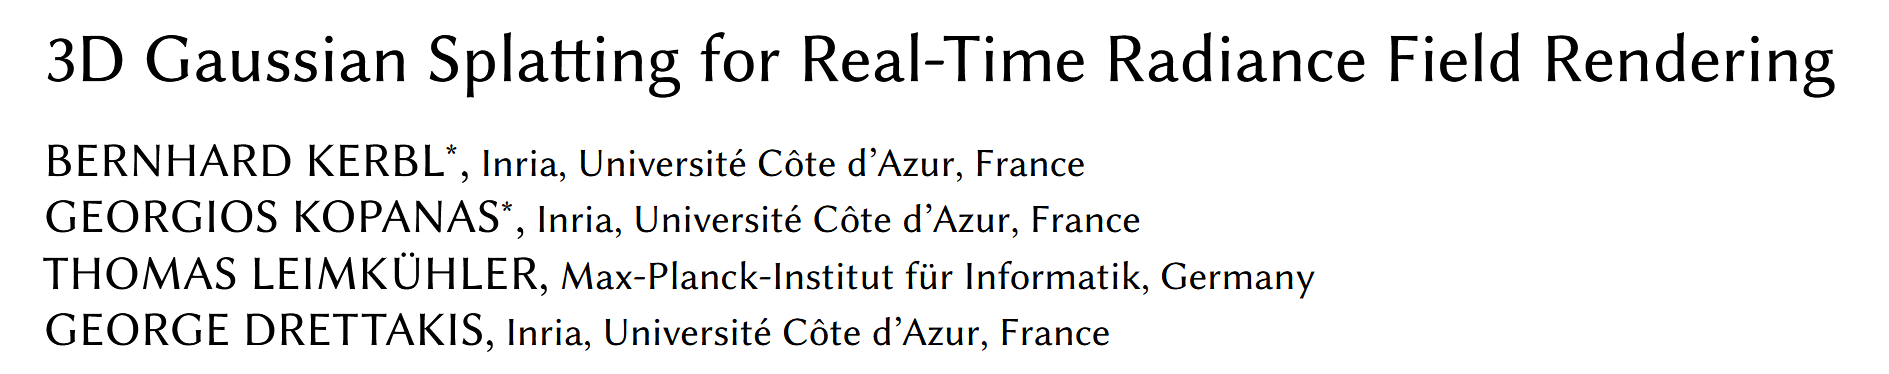

# 3D Gaussian Splatting for Real-Time Radiance Field Rendering  
**Bernhard Kerbl, Georgios Kopanas, Thomas Leimkühler, George Drettakis**  
Inria, Université Côte d’Azur, Max-Planck-Institut für Informatik  
Published in *ACM Transactions on Graphics*, SIGGRAPH 2023

---

## Background

In recent years, Neural Radiance Fields (NeRFs) [Mildenhall et al. 2020] have emerged as a powerful representation for synthesizing novel views of a scene. NeRF models use **multi-layer perceptrons (MLPs)** and **volumetric ray marching**, allowing them to model fine geometry and view-dependent color. However, **NeRFs are notoriously slow** — rendering even a single image can take seconds, and training can take days.

Many methods have tried to accelerate NeRFs:

- **Mip-NeRF360** [Barron et al. 2022] achieves state-of-the-art quality but takes ~48 hours to train.
- **Plenoxels** [Fridovich-Keil et al. 2022] and **InstantNGP** [Müller et al. 2022] significantly reduce training time, but still struggle to render at real-time speeds for 1080p images.

These trade-offs raise a central question:  
> 💡 *Can we achieve both real-time rendering and high quality radiance field representation — without sacrificing speed or memory?*

---

## The Core Idea

This paper proposes a new paradigm: **3D Gaussian Splatting**.

Instead of voxel grids or MLPs, the authors represent scenes using a set of **anisotropic 3D Gaussians** in world space. These Gaussians can be:
- Projected to 2D splats for efficient rasterization,
- Differentiably optimized,
- Interleaved with **adaptive density control**, adding/removing Gaussians as needed.

### Key Formulae:

1. **3D Gaussian definition** (center $\mu$, covariance $\Sigma$):

$$
G(\mathbf{x}) = e^{ -\frac{1}{2} (\mathbf{x} - \mu)^T \Sigma^{-1} (\mathbf{x} - \mu) }
$$

2. **Covariance as ellipsoid** with rotation $R$ and scaling $S$:

$$
\Sigma = R S S^T R^T
$$

3. **Volumetric Rendering Equation** (NeRF-like form):

$$
C = \sum_{i=1}^{N} T_i \alpha_i \mathbf{c}_i
$$

where:

- $\alpha_i = 1 - \exp(-\sigma_i \delta_i)$  
- $T_i = \prod_{j=1}^{i-1} (1 - \alpha_j)$

This equation is also compatible with alpha-blending in point-based rendering. Unlike NeRF, there's no need to march along rays or sample dense volumes.

4. **Projection to 2D** for rasterization (via Jacobian $J$ and camera transformation $W$):

$$
\Sigma' = J W \Sigma W^T J^T
$$

This allows rendering using **tile-based sorting**, enabling real-time rendering and differentiability.

---

## Contributions

This paper introduces:

- A **novel scene representation** using anisotropic 3D Gaussians optimized from SfM points.
- An **interleaved optimization strategy** with adaptive Gaussian densification (clone/split).
- A **real-time differentiable rasterizer** that allows fast training and high-quality rendering.

---

## References

- Mildenhall et al., NeRF: Representing Scenes as Neural Radiance Fields, ECCV 2020  
- Barron et al., Mip-NeRF360: Unbounded Anti-Aliased Neural Radiance Fields, CVPR 2022  
- Fridovich-Keil et al., Plenoxels: Radiance Fields without Neural Networks, CVPR 2022  
- Müller et al., InstantNGP: Instant Neural Graphics Primitives, SIGGRAPH 2022  
- Zwicker et al., EWA Volume Splatting, IEEE Vis 2001

